In [ ]:
import os 
from PIL import Image
import numpy as np
dir = "NWPU-RESISC45"
lables = os.listdir(dir)
imgs = []
img_lables = []
for i, lable in enumerate(lables):
    print("running ", lable)
    for img_name in os.listdir(f"{dir}/{lable}"):
        img = Image.open(f"{dir}/{lable}/{img_name}").convert("L")
        img = img.resize((128,128),Image.Resampling.LANCZOS)
        np_img = np.asanyarray(img)

        imgs.append(np_img)
        img_lables.append(lable)

In [ ]:
imgs_t = np.asanyarray(imgs, np.uint8)
img_lables_t = np.asanyarray(img_lables)
np.save('../numpy_data/imgs_t',imgs_t) 
np.save('../numpy_data/img_lables_t',img_lables_t)

In [1]:
import os 
import numpy as np

dir = "NWPU-RESISC45"
lables = os.listdir(dir)

imgs_t = np.load('../numpy_data/imgs_t.npy')
img_lables_t = np.load('../numpy_data/img_lables_t.npy')
imgs_t.shape


(31500, 128, 128)

In [2]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
imgs, img_lables = unison_shuffled_copies(imgs_t, img_lables_t)

del imgs_t
del img_lables_t


In [3]:
dataset_usage = 1
indx = int(len(imgs)*dataset_usage)
imgs = np.asanyarray(imgs[:indx])
img_lables = np.asanyarray(img_lables[:indx])

chaparral


(31500, 128, 128)

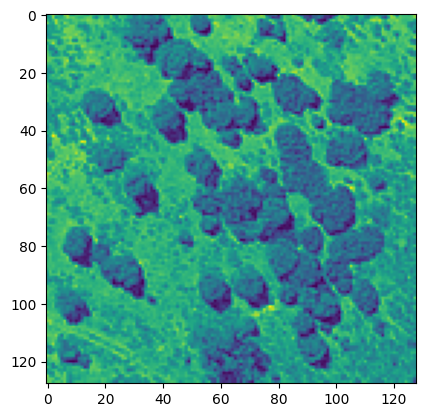

In [4]:
import matplotlib.pyplot as plt
import random
ind = random.randint(0, 100)
plt.imshow(imgs[ind])
print(img_lables[ind])
imgs.shape


In [5]:
test_split = 0.2
split_indx = int(imgs.shape[0]*test_split)

test_img, training_img = imgs[:split_indx,:], imgs[split_indx:,:]
test_img_lables, training_img_lables = img_lables[:split_indx], img_lables[split_indx:]

print(test_img.shape[0], training_img.shape[0])
test_img.shape


6300 25200


(6300, 128, 128)

In [6]:
training_img = training_img.astype('float16') / 255
test_img = test_img.astype('float16') / 255
#test_img = test_img.reshape((test_img.shape[0],512*512))

In [7]:
test_img_lables = [lables.index(i)for i in test_img_lables]
training_img_lables = [lables.index(i)for i in training_img_lables]

In [8]:
from tensorflow.keras.utils import to_categorical

test_img_lables = to_categorical(test_img_lables)
training_img_lables = to_categorical(training_img_lables)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers



model = models.Sequential()
#model.add(Embedding(y_train.shape[0], 32))

model.add(layers.Conv2D(64, kernel_size = (3, 3),  padding = 'same',activation = 'relu', input_shape = (128,128,1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(layers.Conv2D(64, kernel_size = (3, 3),  padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(layers.Conv2D(128, kernel_size = (3, 3),  padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(layers.Conv2D(128, kernel_size = (3, 3),  padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(45, activation = 'softmax'))

from tensorflow.keras import optimizers

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics=['accuracy'])
model.summary()

In [12]:
history = model.fit(training_img, training_img_lables, epochs=10, validation_split=0.1)
#print(model.evaluate(test_img,test_img_lables))

Epoch 1/10
709/709 [==============================] - 26s 29ms/step - loss: 3.0608 - accuracy: 0.1788 - val_loss: 2.4446 - val_accuracy: 0.3310
Epoch 2/10
709/709 [==============================] - 21s 29ms/step - loss: 2.2165 - accuracy: 0.3770 - val_loss: 1.8947 - val_accuracy: 0.4548
Epoch 3/10
709/709 [==============================] - 21s 29ms/step - loss: 1.7913 - accuracy: 0.4862 - val_loss: 1.7513 - val_accuracy: 0.4944
Epoch 4/10
709/709 [==============================] - 21s 29ms/step - loss: 1.4897 - accuracy: 0.5665 - val_loss: 1.7612 - val_accuracy: 0.5206
Epoch 5/10
709/709 [==============================] - 21s 29ms/step - loss: 1.2781 - accuracy: 0.6304 - val_loss: 1.5074 - val_accuracy: 0.5667
Epoch 6/10
709/709 [==============================] - 20s 29ms/step - loss: 1.1155 - accuracy: 0.6736 - val_loss: 1.5099 - val_accuracy: 0.5853
Epoch 7/10
709/709 [==============================] - 20s 28ms/step - loss: 0.9902 - accuracy: 0.7113 - val_loss: 1.4959 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


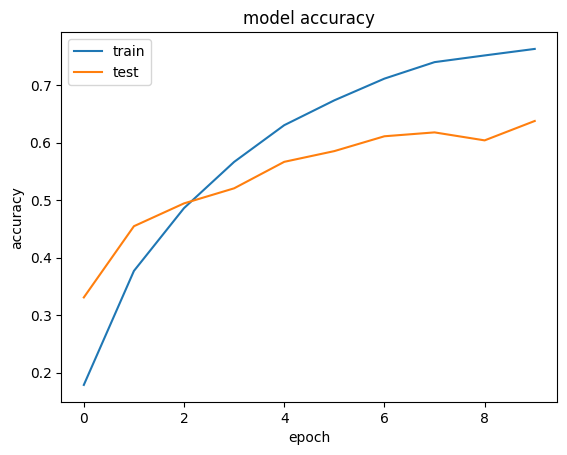

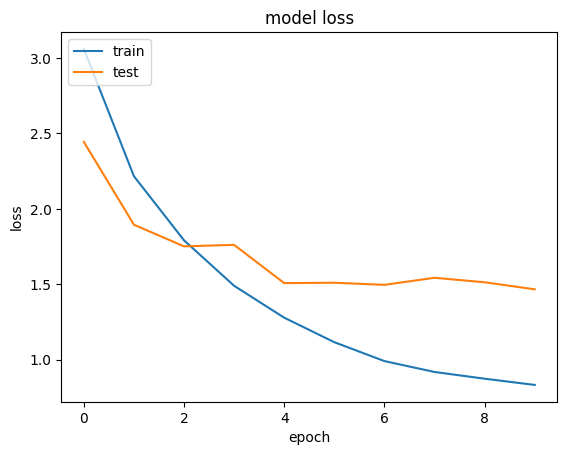

In [13]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 193ms/step
model says:  sparse_residential
unser:  medium_residential


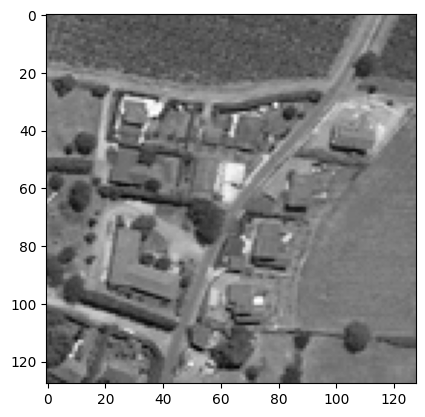

In [14]:
ind = random.randint(0,1000)

img = np.asarray([test_img[ind]])
prediction = model.predict([img])[0]
pred_ind = np.where(prediction == prediction.max())
print("model says: ", lables[pred_ind[0][0]])

text = test_img_lables[ind]
text_ind = np.where(text == 1)
print("unser: ", lables[text_ind[0][0]])

plt.imshow(255 - np.int16(img[0]*255), cmap="Greys")


In [15]:
path='../weights/weights_cnn.h5'
 
# save
# model.save_weights(path)